In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quirky Data Science
*By [Daniel Lee](https://github.com/dleestat)*

## A Knights Problem

### Question
If a knight starts in the corner of a chessboard and on each step moves at random, how long on average does it take to return to its starting position?

<img src='img/knight.jpeg' style='width: 200px'/>

### Answer
For this problem, we will use a result derived from graph theory and stochastic processes.

---
**Random walk on a graph:**

Let $G=(V,E)$ be a finite, undirected, connected graph. For each vertex $v \in V$, let $d(v)$ be the degree of $v$. For all $u$, $v \in V$, write $u \sim v$ if $u$ and $v$ are adjacent. For all $u$, $v \in V$, let

$$p(v,w) = \begin{cases}\frac{1}{d(v)}~\text{if}~w \sim v\\0~\text{otherwise.}\end{cases}$$

The discrete time Markov chain with state space $V$ and transition probabilities $p(v,w)$ is called the random walk on $G$. For example, if $p(5,2)=\frac{1}{3}$, if we are currently at vertex $5$, there is a $\frac{1}{3}$ probability we willl visit vertex $2$ next.

Note that the random walk is irreducible because the graph is connected. Since the random walk is irreducible and has a finite state space, the random walk has a unique stationary distribution. Here, the unique stationary distribution of the random walk is a probability distribution over $V$ that remains unchanged as time progresses.

Let $d=\sum_{w \in V} d(w)$ be the sum of the degrees of the vertices in $V$. For all $v \in V$, let $\pi(v)=\frac{d(v)}{d}$, so

$$\sum_{w \in V} \pi(w)p(w,v)
= \sum_{w \in V} \frac{d(w)}{d}p(w,v)
= \sum_{w: w \sim v} \frac{d(w)}{d} \cdot \frac{1}{d(w)}
= \sum_{w: w \sim v} \frac{1}{d}
= \frac{d(v)}{d}
= \pi(v),$$

so $\pi$ is a stationary distribution for the random walk on $G$. As a result, $\pi(v)=\frac{d(v)}{d}$ is the long run fraction of time that the random walk spends at vertex $v$.

---
Here, the knight's movement across the board is a random walk on the graph whose vertices are the 64 squares such that $v \sim w$ if a knight can move from square $v$ to square $w$. So $d(v)$ is the number of squares to which a knight can move from square $v$ and $\pi(v)=\frac{d(v)}{d}$ is the long run fraction of time that the knight spends at square $v$.

The plot below visualizes the number of squares to which a knight can move from each square of the chessboard.

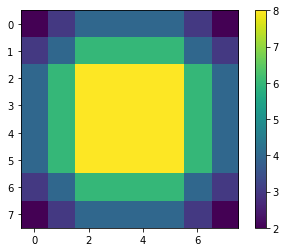

In [2]:
degrees = np.array([
    [2,3,4,4,4,4,3,2],
    [3,4,6,6,6,6,4,3],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [3,4,6,6,6,6,4,3],
    [2,3,4,4,4,4,3,2],
])
plt.imshow(degrees)
plt.colorbar();

In [3]:
np.sum(degrees)

336

Here, $d=336$. If $x$ is a corner square, $d(x)=2$, so $\pi(x)=\frac{d(x)}{d}=\frac{2}{336}=\frac{1}{118}$ is the long run fraction of time that the knight spends at square $x$. Therefore, the random walk's expected return time to $x$ is $\frac{1}{\pi(x)}=118$ moves, so it takes 118 moves on average for the knight to return to its starting position.

### References
- https://www.chess.com/analysis